*Author: Marcello Victorino* <br>
*Date: 2019-02-19*
# Project 1: Weather Trend
**[Requirement 1]** <br>
The first step was to query the available database and use SQL commands to extract the Global yearly average temperature data, as well as for the closest big city from where I currently live.

First, I identified the which cities in the country I currently live in are included in the provided database:
```sql
SELECT * FROM city_list WHERE country = "United Kingdom";
```

After a quick Google Maps Directions search, London is closer to Didcot than Birmingham. Hence, London, UK is the closest big city I will be working on. So I needed to extract the weather data for this city:

```sql
SELECT * FROM city_data WHERE city = 'London' AND country = 'United Kingdom'
```

As a bonus, I also downloaded data from the other places I used to live in: Houston, USA and Rio de Janeiro, Brazil:

```sql
SELECT * FROM city_data WHERE city = 'Houston' AND country = 'United States';
SELECT * FROM city_data WHERE city = 'Rio De Janeiro' AND country = 'Brazil'
```

Finally, I downloaded the Global data:
```sql
SELECT * FROM global_data
```
Now we start manipulating the datasets, making sure the features have the correct data type, addressing missing data etc. 

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot') # just for some nicer plots

In [2]:
# Reading the csv files
df_global = pd.read_csv('Weather - Global.csv', parse_dates=True, index_col='year')
df_global.info()

df_global.rename(columns={'avg_temp':'Global_Temperature'}, inplace=True)

df_global.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1750-01-01 to 2015-01-01
Data columns (total 1 columns):
avg_temp    266 non-null float64
dtypes: float64(1)
memory usage: 4.2 KB


,Global_Temperature
year,
1750-01-01,8.72
1751-01-01,7.98
1752-01-01,5.78
1753-01-01,8.39
1754-01-01,8.47


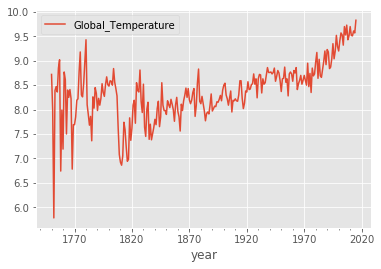

In [3]:
df_global.plot()
plt.show()

**[Requirement 2]**<br>
There is an awful lot of variation (noise) in the dataset, making it dificult to analyze it. Let's apply a Rolling Mean for different time windows and check the results:

<Figure size 432x288 with 0 Axes>

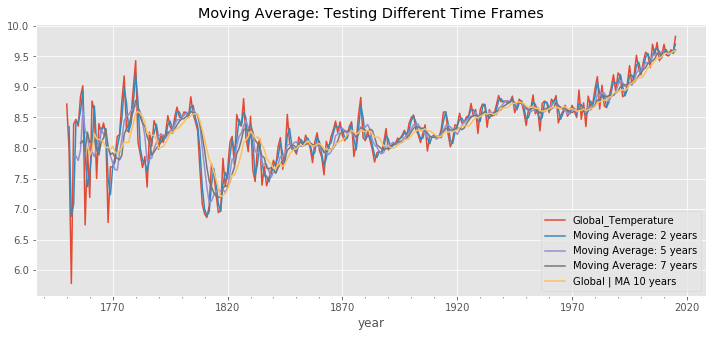

In [4]:
plt.clf()
df_global['Moving Average: 2 years'] = df_global.Global_Temperature.rolling(window=2).mean()
# 2 years barely makes a difference in the plot

df_global['Moving Average: 5 years'] = df_global.Global_Temperature.rolling(window=5).mean()
# 5 years still shows multiple spikes in the data

df_global['Moving Average: 7 years'] = df_global.Global_Temperature.rolling(window=7).mean()
df_global['Global | MA 10 years'] = df_global.Global_Temperature.rolling(window=10).mean()
df_global.plot(figsize=(12,5), title='Moving Average: Testing Different Time Frames')
plt.show()

After comparing different values for the moving average, it is possible to see that 2 and 5 years do not smooth the data significantly. 

In the other hand, using 10 years resulted in a smooth plot, but still sensitive enough to represent the long term trend. So, from now on we will use the Moving Average of 10 years to analyze Global and Local average temperature data.

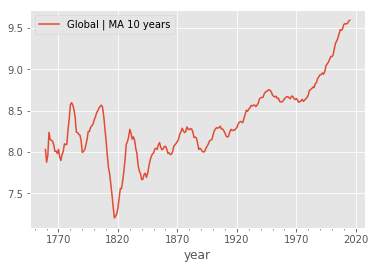

In [5]:
df_global['Global | MA 10 years'].plot()
plt.legend()
plt.show()

In [6]:
df_global['Global | MA 10 years'].describe()

count    257.000000
mean       8.353961
std        0.452483
min        7.203000
25%        8.059000
50%        8.275000
75%        8.642000
max        9.594000
Name: Global | MA 10 years, dtype: float64

## Working on Local City (London, UK)

In [7]:
df_london = pd.read_csv('Weather - London-UK.csv', parse_dates=True, index_col='year')
df_london.info()
df_london.rename(columns={'avg_temp':'London_Temperature'}, inplace=True) 

df_london.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 271 entries, 1743-01-01 to 2013-01-01
Data columns (total 3 columns):
city        271 non-null object
country     271 non-null object
avg_temp    267 non-null float64
dtypes: float64(1), object(2)
memory usage: 8.5+ KB


,city,country,London_Temperature
year,,,
1743-01-01,London,United Kingdom,7.54
1744-01-01,London,United Kingdom,10.34
1745-01-01,London,United Kingdom,4.13
1746-01-01,London,United Kingdom,NaN
1747-01-01,London,United Kingdom,NaN


The info() method provided a quick overview of our Dataframe, which contains 271 entries. But there are only 267 non-null values for the feature "avg_temp": that means we have 4 missing values.

In [8]:
# Show rows with missing value
df_london[df_london.isnull().any(axis=1)] # axis=1 -> looking at the columns

,city,country,London_Temperature
year,,,
1746-01-01,London,United Kingdom,NaN
1747-01-01,London,United Kingdom,NaN
1748-01-01,London,United Kingdom,NaN
1749-01-01,London,United Kingdom,NaN


There is no data for the years of 1746 - 1749.

One alternative is to fill the missing data using a linear interpolation method. But this method did not yield good results: the moving average was significantly affected but the very low temperatures in those first years of the dataset.

In this case, since the Global data only starts at 1750, we can simply drop the local values before this time without losing any important data.

<strike>After filling the missing values using linear interpolation, we apply the Moving Average over 10 years for London, UK:</strike>

In [9]:
# Removed interpolation since did not yield good results
# df_london.London_Temperature.interpolate('linear', inplace=True)

# Removing rows before 1750
df_london = df_london.loc["1750":]

Applying the Moving Average over 10 years:

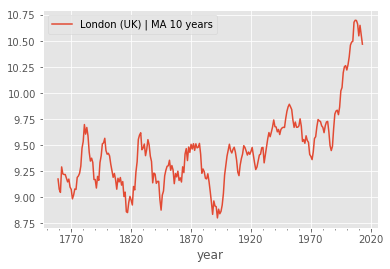

In [10]:
df_london['London (UK) | MA 10 years'] = df_london.London_Temperature.rolling(window=10).mean()
df_london['London (UK) | MA 10 years'].plot()
plt.legend()
plt.show()

In [11]:
df_london['London (UK) | MA 10 years'].describe()

count    255.000000
mean       9.450353
std        0.370030
min        8.802000
25%        9.203000
50%        9.415000
75%        9.620500
max       10.701000
Name: London (UK) | MA 10 years, dtype: float64

## Replicating for additional cities

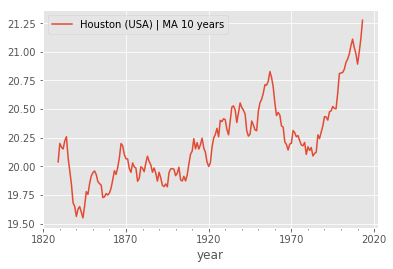

count    185.000000
mean      20.211735
std        0.347306
min       19.550000
25%       19.954000
50%       20.171000
75%       20.408000
max       21.276000
Name: Houston (USA) | MA 10 years, dtype: float64

In [12]:
df_houston = pd.read_csv('Weather - Houston-USA.csv', parse_dates=True, index_col='year')
# df_houston.info() # no missing values
df_houston.rename(columns={'avg_temp':'Houston_Temperature'}, inplace=True) 

df_houston['Houston (USA) | MA 10 years'] = df_houston.Houston_Temperature.rolling(window=10).mean()
df_houston['Houston (USA) | MA 10 years'].plot()
plt.legend()
plt.show()

df_houston['Houston (USA) | MA 10 years'].describe()

In [13]:
df_rio = pd.read_csv('Weather - Rio de Janeiro-BR.csv', parse_dates=True, index_col='year')
df_rio.info() # 7 missing values
df_rio.rename(columns={'avg_temp':'Rio_Temperature'}, inplace=True) 

df_rio[df_rio.isnull().any(1)] # checking for missing data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 1832-01-01 to 2013-01-01
Data columns (total 3 columns):
city        182 non-null object
country     182 non-null object
avg_temp    175 non-null float64
dtypes: float64(1), object(2)
memory usage: 5.7+ KB


,city,country,Rio_Temperature
year,,,
1844-01-01,Rio De Janeiro,Brazil,NaN
1845-01-01,Rio De Janeiro,Brazil,NaN
1846-01-01,Rio De Janeiro,Brazil,NaN
1847-01-01,Rio De Janeiro,Brazil,NaN
1848-01-01,Rio De Janeiro,Brazil,NaN
1849-01-01,Rio De Janeiro,Brazil,NaN
1850-01-01,Rio De Janeiro,Brazil,NaN


Let's interpolate to fill the missing values from 1844 to 1850

In [14]:
df_rio.Rio_Temperature.interpolate("linear", inplace=True)
df_rio.info() # no more missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 1832-01-01 to 2013-01-01
Data columns (total 3 columns):
city               182 non-null object
country            182 non-null object
Rio_Temperature    182 non-null float64
dtypes: float64(1), object(2)
memory usage: 5.7+ KB


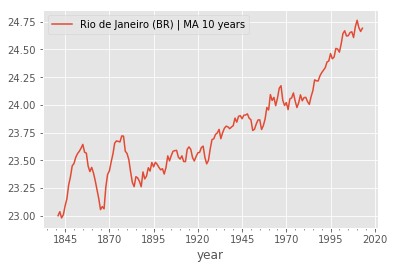

count    173.000000
mean      23.772936
std        0.419826
min       22.980000
25%       23.480000
50%       23.694000
75%       24.037000
max       24.764000
Name: Rio de Janeiro (BR) | MA 10 years, dtype: float64

In [15]:
df_rio['Rio de Janeiro (BR) | MA 10 years'] = df_rio.Rio_Temperature.rolling(window=10).mean()
df_rio['Rio de Janeiro (BR) | MA 10 years'].plot()
plt.legend()
plt.show()

df_rio['Rio de Janeiro (BR) | MA 10 years'].describe()

## Comparing Global vs Local Temperature Data

Now that we have gathered, cleaned and calculated the moving average for both Global and specific cities data, it is time to compare them:

In [16]:
# merging the different Dataframes side by side (axis=1)
weather_all = pd.concat([df_global, df_london, df_houston, df_rio], axis=1)
weather_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1750-01-01 to 2015-01-01
Freq: AS-JAN
Data columns (total 17 columns):
Global_Temperature                   266 non-null float64
Moving Average: 2 years              265 non-null float64
Moving Average: 5 years              262 non-null float64
Moving Average: 7 years              260 non-null float64
Global | MA 10 years                 257 non-null float64
city                                 264 non-null object
country                              264 non-null object
London_Temperature                   264 non-null float64
London (UK) | MA 10 years            255 non-null float64
city                                 194 non-null object
country                              194 non-null object
Houston_Temperature                  194 non-null float64
Houston (USA) | MA 10 years          185 non-null float64
city                                 182 non-null object
country                              182 non-null object

Necessary to clean the data, keeping only the desired columns

In [17]:
weather_all.columns

Index(['Global_Temperature', 'Moving Average: 2 years',
       'Moving Average: 5 years', 'Moving Average: 7 years',
       'Global | MA 10 years', 'city', 'country', 'London_Temperature',
       'London (UK) | MA 10 years', 'city', 'country', 'Houston_Temperature',
       'Houston (USA) | MA 10 years', 'city', 'country', 'Rio_Temperature',
       'Rio de Janeiro (BR) | MA 10 years'],
      dtype='object')

In [18]:
weather_all_clean = weather_all.loc[:, ['Global | MA 10 years', 'London (UK) | MA 10 years',
                                'Houston (USA) | MA 10 years', 'Rio de Janeiro (BR) | MA 10 years'] ]

**[Requirement 3]**<br>
Now let's prepare the final line chart plot, comparing Global vs Local average temperature data (using moving average over 10 years), and adding the supplementary information such as title and axis labels:

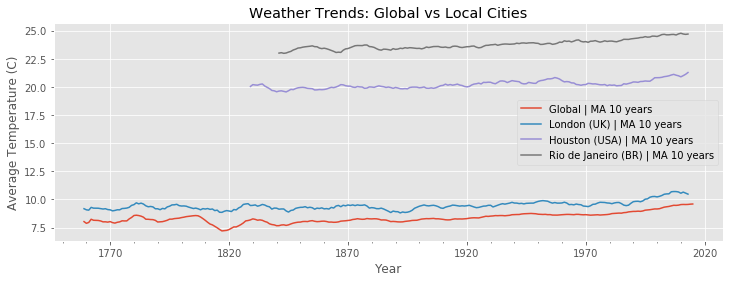

In [19]:
weather_all_clean.plot(figsize=(12,4))
plt.title('Weather Trends: Global vs Local Cities')
plt.ylabel('Average Temperature (C)')
plt.xlabel('Year')
plt.show()

Now let's dive deeper and analyze similarities and differences between the Global and the closest big city (London, UK):

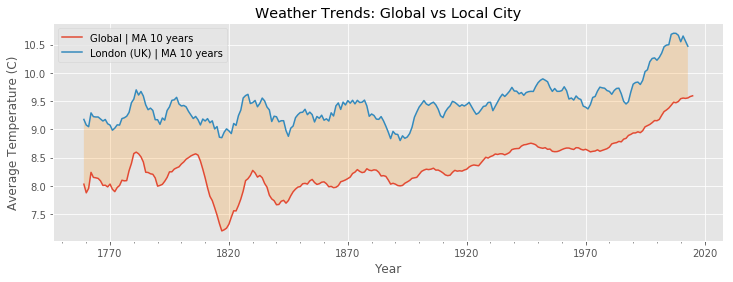

In [20]:
weather_all_clean[ ['Global | MA 10 years', 'London (UK) | MA 10 years'] ].plot(figsize=(12,4))
plt.title('Weather Trends: Global vs Local City')
plt.ylabel('Average Temperature (C)')
plt.xlabel('Year')

plt.fill_between(weather_all_clean.index,weather_all_clean['London (UK) | MA 10 years'],
                 weather_all_clean['Global | MA 10 years'], facecolor='darkorange', alpha=0.2)
plt.show()

Looking at the line chart above it is clear to see that London, UK is actually hotter than the Global average - there must be some very cold locations around the world that are pulling the Global average down!

The difference seems to be quite consistent, having peaks and valleys usually ocurring at the same time. But let's analyze this difference in yearly average temperature:

In [21]:
delta_temperature = weather_all_clean['London (UK) | MA 10 years'] - weather_all_clean['Global | MA 10 years']

delta_temperature.describe()

count    255.000000
mean       1.106067
std        0.211137
min        0.598000
25%        0.960500
50%        1.102000
75%        1.212500
max        1.757000
dtype: float64

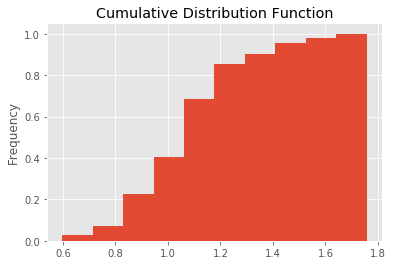

90th percentile: 1.40 C


In [30]:
delta_temperature.plot(kind='hist', density=True, cumulative=True,
                       title='Cumulative Distribution Function')
plt.show()

print('90th percentile: {:.2f} C'.format(delta_temperature.quantile(0.90)))

Here we can see that 90% of the time, the difference between London and Global average temperature is less than 1.4 degrees Celsius.

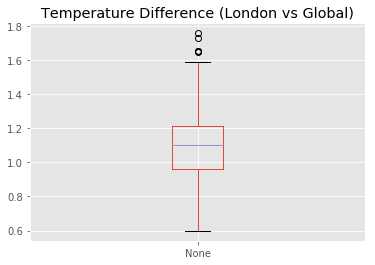

In [23]:
delta_temperature.plot(kind='box', title='Temperature Difference (London vs Global)')
plt.show()

Looking at the box-plot we can see the central 50% of the temperature difference is between 1 and 1.2 degrees Celsius, having the mean and median at 1.1 C.

It is also possible to note there are a few outliers. Let's investigate them:

In [24]:
# Calculating Outliers (Tukey's fences method)
q3 = delta_temperature.quantile(0.75)
q1 = delta_temperature.quantile(0.25)
k = 1.5 # typical assumed value
iqr = q3 - q1 # Inter Quartile Range

print('Outliers: < {:.2f} C | > {:.2f} C \n'.format(q1 - k*iqr, q3 + k*iqr))

print(delta_temperature[delta_temperature > (q3 + k*iqr) ])

Outliers: < 0.58 C | > 1.59 C 

year
1817-01-01    1.650
1818-01-01    1.727
1819-01-01    1.757
1820-01-01    1.651
1826-01-01    1.646
dtype: float64


As a matter of fact, there are only 5 occurrences when the temperature difference is significantly far from the [1, 1.2] range. They occur in the years of 1817-1820 and 1826; which is a long time ago.

So it is safe to say that for more recent years, the temperature difference is indeed quite consistent around 1.1 degress Celsius.

In addition, it is possible to see there is a pattern of up's and down's in the Global average temperature every 10 years... up until around 1920. After this, the average temperature still slightly fluctuates, but with bigger up's than down's, forming an overall trend of actual warming.

This trend becomes quite clear after 1970, where the Global average temperature pretty much grows linearly!

Therefore, I would like to further investigate the hypothesis in which there is a different "behavior" in the average temperature before/after the year of 1920:

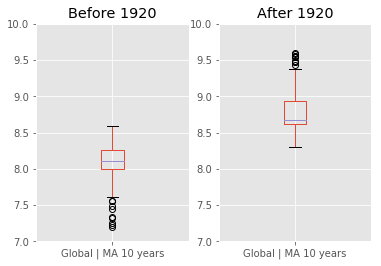

In [25]:
before = weather_all_clean[:'1919']
after = weather_all_clean['1920':]

# Plotting the charts side by side and forcing the same range in the y axis
plt.subplot(1,2,1)
plt.ylim(7,10)
before['Global | MA 10 years'].plot(kind='box', title='Before 1920')

plt.subplot(1,2,2)
plt.ylim(7,10)
after['Global | MA 10 years'].plot(kind='box', title='After 1920')
plt.show()

Even though this is not an actual hypothesis testing methodology, it is clear to see there is a significantly difference in the data distribution between these two different time frames (before/after 1920). 

As expected, before 1920 the global average temperature was cooler and varying from 7.5 and 8.5 degrees Celsius. Whereas after 1920 it is warmer, fluctuating from 8.3 and 9.3 degrees Celsius.

In [26]:
# Correlation Analysis for data after 1920
after.corr()

,Global | MA 10 years,London (UK) | MA 10 years,Houston (USA) | MA 10 years,Rio de Janeiro (BR) | MA 10 years
Global | MA 10 years,1.000000,0.933534,0.755411,0.945460
London (UK) | MA 10 years,0.933534,1.000000,0.827273,0.846845
Houston (USA) | MA 10 years,0.755411,0.827273,1.000000,0.610886
Rio de Janeiro (BR) | MA 10 years,0.945460,0.846845,0.610886,1.000000


The high level of correlation between the Global and Local cities average temperature after 1920  supports that the diference of temeprature is quite consistente along the time. 

In this particular case, we can expect Rio de Janeiro and London, with 94% and 93% correlation to the Global temperature,respectively, to yield the most accurate predictions:


LinregressResult(slope=1.1020872087622968, intercept=0.09244019635782585, rvalue=0.9335335689789535, pvalue=9.118950260043741e-43, stderr=0.04412341792797561) 



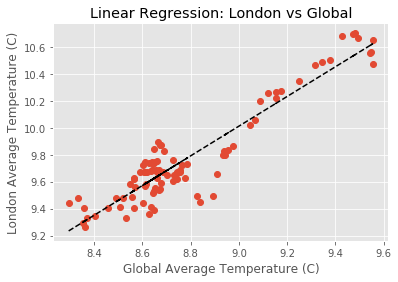

Linear Regression Formula: 
 y = 1.10 * X + 0.09 

Where, 
 X: Global Avg Temperature 
 y: Predicted London Avg Temperature 

R-value: 0.93


In [27]:
# Linear Regression for London | y = a*x + b
import numpy as np
from scipy.stats import linregress

x = after['Global | MA 10 years']
y = after['London (UK) | MA 10 years']

# Making sure to use only actual values. NaN are not accepted for Regressions
idx = np.isfinite(x) & np.isfinite(y) # nice trick to always use only good pairs of values

#fit = np.polyfit(x[idx], y[idx], 1) # does not provide extra info, such as R value

model = linregress(x[idx], y[idx])
print(model, '\n')

# Transforming the Linear Regression into a function to be plotted | Code by DSM on Stack Overflow
fit_fn = np.poly1d( [model[0], model[1]] )
plt.plot(x[idx], y[idx], 'o', x[idx], fit_fn(x[idx]), '--k')
plt.title('Linear Regression: London vs Global')
plt.xlabel('Global Average Temperature (C)')
plt.ylabel('London Average Temperature (C)')
plt.show()

print("Linear Regression Formula: \n y = {:.2f} * X + {:.2f} \n".format(model[0], model[1]))
print('Where, \n X: Global Avg Temperature \n y: Predicted London Avg Temperature \n')
print('R-value: {:.2f}'.format(model[2]))

In [28]:
# Linear Regression for Houston | y = a*x + b
x = after['Global | MA 10 years']
y = after['Houston (USA) | MA 10 years']

# Making sure to use only actual values. NaN are not accepted for Regressions
idx = np.isfinite(x) & np.isfinite(y) # nice trick to always use only good pairs of values

model = linregress(x[idx], y[idx])
print(model, '\n')

print("Linear Regression Formula: \n y = {:.2f} * X + {:.2f} \n".format(model[0], model[1]))
print('Where, \n X: Global Avg Temperature \n y: Predicted Houston Avg Temperature \n')
print('R-value: {:.2f}'.format(model[2]))

LinregressResult(slope=0.6791704294276079, intercept=14.499462773155297, rvalue=0.7554111045879235, pvalue=1.402130357228395e-18, stderr=0.06141992459994602) 

Linear Regression Formula: 
 y = 0.68 * X + 14.50 

Where, 
 X: Global Avg Temperature 
 y: Predicted Houston Avg Temperature 

R-value: 0.76


In [29]:
# Linear Regression for Rio | y = a*x + b
x = after['Global | MA 10 years']
y = after['Rio de Janeiro (BR) | MA 10 years']

# Making sure to use only actual values. NaN are not accepted for Regressions
idx = np.isfinite(x) & np.isfinite(y) # nice trick to always use only good pairs of values

model = linregress(x[idx], y[idx])
print(model, '\n')

print("Linear Regression Formula: \n y = {:.2f} * X + {:.2f} \n".format(model[0], model[1]))
print('Where, \n X: Global Avg Temperature \n y: Predicted Rio de Janeiro Avg Temperature \n')
print('R-value: {:.2f}'.format(model[2]))

LinregressResult(slope=1.0060417209308419, intercept=15.225480369858078, rvalue=0.9454597069503689, pvalue=1.3387602422875797e-46, stderr=0.03613673462870294) 

Linear Regression Formula: 
 y = 1.01 * X + 15.23 

Where, 
 X: Global Avg Temperature 
 y: Predicted Rio de Janeiro Avg Temperature 

R-value: 0.95


--------
## Summarizing Results
**Requirement 4**:

**A)** London, UK is consistently hotter than the Global average, with a mean temperature of 9.5 versus 8.3 degrees Celsius;

**B)** As a matter of fact, there are only 5 occurrences when the temperature difference is significantly far from the [1, 1.2] range. They occur in the years of 1817-1820 and 1826; which is a long time ago.
So it is safe to say that for more recent years, the temperature difference is indeed quite consistent around 1.1 degrees Celsius;

**C)** Looking at the line chart, it is possible to see that London presents the same trend as the Global average temperature: they both seem to be getting warmer recently;

**D)** In addition, it is possible to see there is a pattern of ups and downs in the average temperature every 10 years... up until around 1920. After this, the average temperature still slightly fluctuates, but with bigger ups than downs, forming an overall trend of actual warming.
This trend becomes quite clear after 1970, when the Global average temperature pretty much grows linearly!

Even though this is not an actual hypothesis testing methodology, the side by side box-plots shows there is a significantly difference in the data distribution before/after 1920. As expected, before 1920 the global average temperature was cooler and varying from 7.5 and 8.5 degrees Celsius. Whereas after 1920 it is warmer, fluctuating from 8.3 and 9.3 degrees Celsius.

Therefore, the global average temperature trend has changed in the past hundred years. <u>Looks like Global Warming is indeed a real event</u>;

**E)** The Linear Regression using only data after 1920 yielded a good model, with R-value of 94%, that can be used to predict London's temperature based on the Global average temperature, in degrees Celsius. With a slope of 1.1 and an intercept of only 0.09, it basically means that London is usually 10% hotter than the Global yearly average temperature;

**F)** Finally, considering all the cities I have lived so far, the same warming trend hold true for Houston and Rio de Janeiro. As expected, Rio and "Hell-stoun" are significantly warmer than London and the Global average, with 23.8 and 20.2 mean degrees Celsius, respectively!

The linear regression model for Rio de Janeiro also yielded good results, with R-value of 95%. With a slope of 1.01 and an intercept of 15, it basically means that Rio is usually 15 degrees Celsius hotter than the Global yearly average temperature.

Personally, I am surprised, since Houston felt way hotter than my native city (Rio). But there are other factors that could account for that: 
+ The winter in Houston was significantly colder than in Rio, pulling down the yearly average temperature;
+ The data provided does not consider the "Real Feel", which could explain why Houston wasn't as hot as I expected. As I learned, the air humidity has a tremendous impact in the real feel (as does wind, rain etc.)... and Houston summer, with around 95% humidity, felt like a sauna!